In [11]:
from copy import deepcopy

import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch

from yolov7.utils.datasets import random_perspective

In [99]:
DEGREES_HYP = {
    "degrees": 45.0,  # image rotation (+/- deg)
    "translate": 0.0,  # image translation (+/- fraction)
    "scale": 0.0,  # image scale (+/- gain)
    "shear": 0,  # image shear (+/- deg)
    "perspective": 0.0
}

TRANSLATE_HYP = {
    "degrees": 0.0,  # image rotation (+/- deg)
    "translate": 0.2,  # image translation (+/- fraction)
    "scale": 0.0,  # image scale (+/- gain)
    "shear": 0,  # image shear (+/- deg)
    "perspective": 0.0
}

SCALE_HYP = {
    "degrees": 0.0,  # image rotation (+/- deg)
    "translate": 0.0,  # image translation (+/- fraction)
    "scale": 1.0,  # image scale (+/- gain)
    "shear": 0,  # image shear (+/- deg)
    "perspective": 0.0
}

SHEAR_HYP = {
    "degrees": 0.0,  # image rotation (+/- deg)
    "translate": 0.0,  # image translation (+/- fraction)
    "scale": 0.0,  # image scale (+/- gain)
    "shear": 2.5,  # image shear (+/- deg)
    "perspective": 0.0
}

PERSPECTIVE_HYP = {
    "degrees": 0.0,  # image rotation (+/- deg)
    "translate": 0.0,  # image translation (+/- fraction)
    "scale": 0.5,  # image scale (+/- gain)
    "shear": 0,  # image shear (+/- deg)
    "perspective": 0.0003
}

MULTIPLE_HYP = {
    "degrees": 40.0,  # image rotation (+/- deg)
    "translate": 0.2,  # image translation (+/- fraction)
    "scale": 0.5,  # image scale (+/- gain)
    "shear": 2.5,  # image shear (+/- deg)
    "perspective": 0.0003
}


In [30]:
def augment_img(img, hyp):
    img, _ = random_perspective(
        img,
        np.array([[0, 0, 0, 1, 1], [0, 0, 0, 1, 1]]),
        degrees=hyp["degrees"],
        translate=hyp["translate"],
        scale=hyp["scale"],
        shear=hyp["shear"],
        perspective=hyp["perspective"],
    )
    return img

In [71]:
def plot_images(imgs: list[np.ndarray], names: list[str]):
    """ Plot images in a column

    Args:
        imgs (list[np.ndarray]): list of images in BGR format uint8
        names (list[str]): list of names for each image
    """
    fig, axes = plt.subplots(len(imgs), figsize=(15, 15))
    if len(imgs) == 1:
        axes = [axes]
    for i, img in enumerate(imgs):
        # BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].set_title(names[i])
    fig.tight_layout()

    plt.show()

In [32]:
def load_img(path):
    """ Load image from path

    Args:
        path (str): path to image
    Returns:
        img (np.ndarray): image in BGR format uint8
    """

    img = cv2.imread(path)  # BGR
    assert img is not None, "Image Not Found " + path
    h0, w0 = img.shape[:2]  # orig hw
    r = 640 / max(h0, w0)  # resize image to img_size
    if r != 1:  # always resize down, only resize up if training with augmentation
        interp = cv2.INTER_LINEAR
        img = cv2.resize(img, (int(w0 * r), int(h0 * r)), interpolation=interp)
    return img

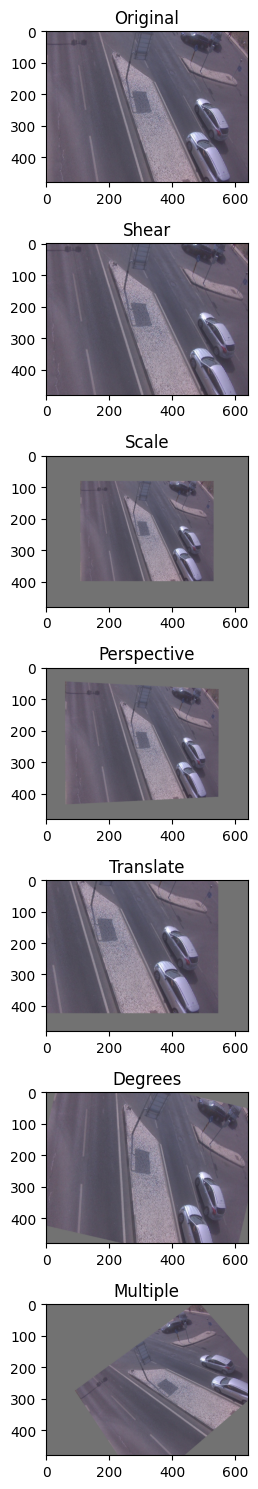

In [105]:
img = load_img("/media/magalhaes/schreder/images/d1_1002_24538.jpg")
img_shear = augment_img(img, SHEAR_HYP)
img_scale = augment_img(img, SCALE_HYP)
img_perspective = augment_img(img, PERSPECTIVE_HYP)
img_translate = augment_img(img, TRANSLATE_HYP)
img_degrees = augment_img(img, DEGREES_HYP)
img_multiple = augment_img(img, MULTIPLE_HYP)
plot_images([img, img_shear, img_scale, img_perspective, img_translate, img_degrees, img_multiple], ["Original", "Shear", "Scale", "Perspective", "Translate", "Degrees", "Multiple"])
